# Libraries and setup variables

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import *

%matplotlib inline
sns.set()

### Loading the processed dataset

Here we'll load the data into a dataframe, and run a series of initial exploratory analysis.

In [4]:
df = pd.read_csv('../data/processed/census_income_learn.csv')

### Initial exploration of features.

First we can see that most of people don't earn over 50K, only 12382 (6.2%) of the entire set of 199523 do.

If we just said that every person earns less than 50K, we'd get over 93% accuracy!!! This will be the benchmark to measure our model training.

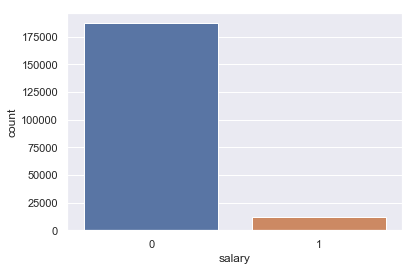

In [3]:
sns.countplot(x='salary', data=df)

### Sex

It's interesting to see that a higher proportion of men earn more than 50K.

**10% of men earn over 50K, while 2.5% of women do.**

0.101728090099
0.025609709186


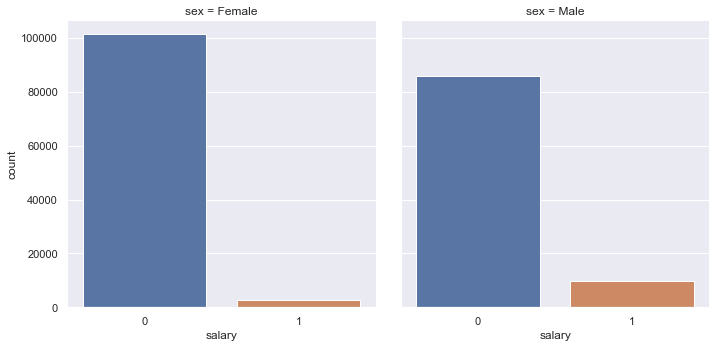

In [6]:
sns.catplot(x='salary', col='sex', kind='count', data=df)
print(df[df['sex']=='Male']['salary'].sum()/df[df['sex']=='Male']['salary'].count())
print(df[df['sex']=='Female']['salary'].sum()/df[df['sex']=='Female']['salary'].count())

### Education level

We can see that (obviously) primary and secondary school education, as well as children don't have income over 50K. 

This column could be simplified in the number of categories.

**Degrees matter, over 20% of those with Under or postgrad earn more than 50K, while only 2% of those that don't.**

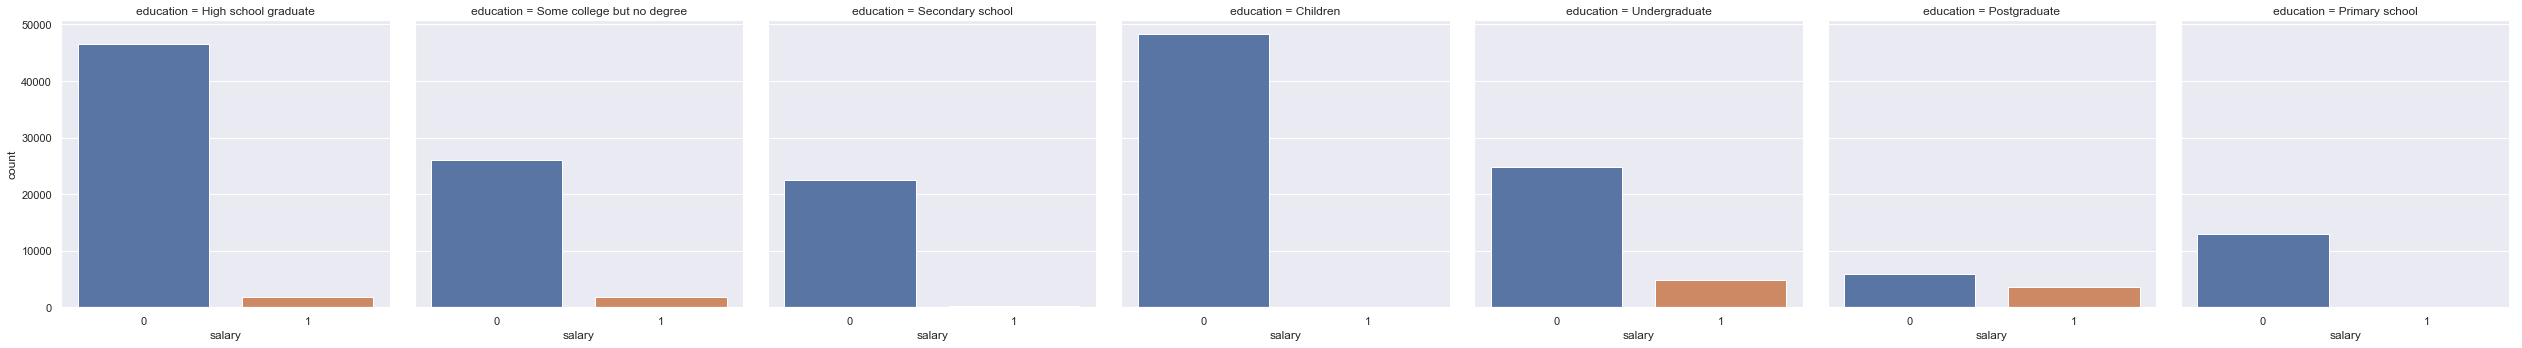

0.214480769722
0.0248097792192


In [29]:
sns.catplot(x='salary', col='education', kind='count', data=df)
plt.show()
print(df[df['education'].isin(['Undergraduate', 'Postgraduate'])]['salary'].sum()/df[df['education'].isin(['Undergraduate', 'Postgraduate'])]['salary'].count())
print(df[~df['education'].isin(['Undergraduate', 'Postgraduate'])]['salary'].sum()/df[~df['education'].isin(['Undergraduate', 'Postgraduate'])]['salary'].count())

### Stocks and capital gains

This seems like should be a strong predictor. However the histograms are not very helpful, since most people don't have capital gains or stocks.

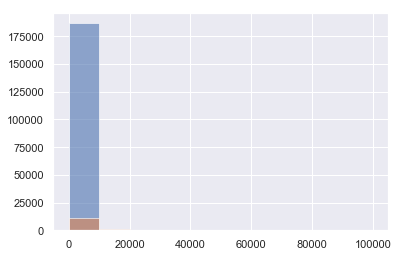

In [13]:
df.groupby('salary')['capital gains'].hist(alpha=0.6)
plt.show()

But we can exclude people without capital gains, in which case we can see that people with capital gains do appear more likely to have a higher income.

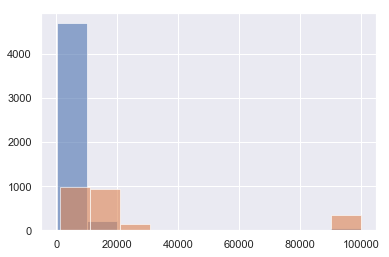

In [12]:
df[df['capital gains']!=0].groupby('salary')['capital gains'].hist(alpha=0.6)
plt.show()

Capital Losses appear more like a mixed bag, since some people managed to earn more than 50K despite the losses.

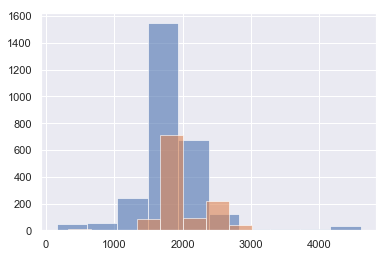

In [11]:
df[df['capital losses']!=0].groupby('salary')['capital losses'].hist(alpha=0.6)
plt.show()

Dividends from stock definitely contribute to the earnings of those with higher income. 

This is also observed in the swarm and strip plots

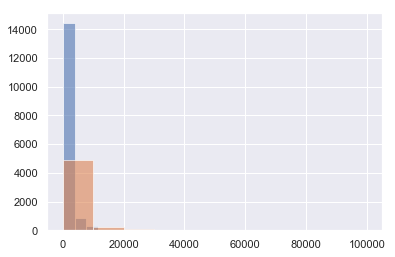

In [16]:
df[df['dividends from stocks']!=0].groupby('salary')['dividends from stocks'].hist(alpha=0.6)
plt.show()

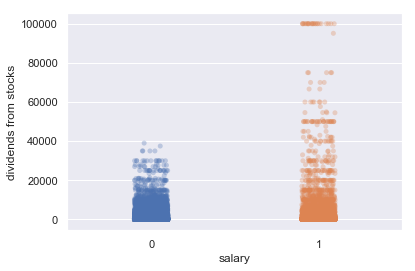

In [17]:
sns.stripplot(x='salary', y='dividends from stocks', data=df[df['dividends from stocks']!=0], alpha=0.3, jitter=True)
plt.show()

**Private workers earn more (not sure what this category means, but...**

10% of those under this category seem to do better than others.

0.101654911979
0.0396878308953


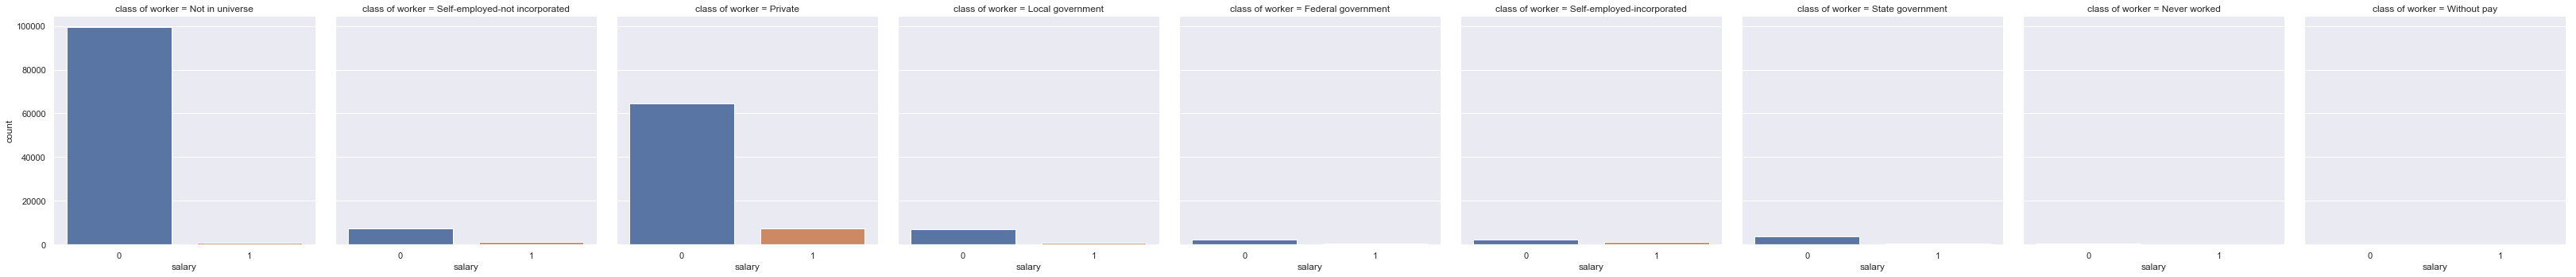

In [16]:
sns.catplot(x='salary', col='class of worker', kind='count', data=df)
print(df[df['class of worker']=='Private']['salary'].sum()/df[df['class of worker']=='Private']['salary'].count())
print(df[df['class of worker']!='Private']['salary'].sum()/df[df['class of worker']!='Private']['salary'].count())

**Married people earn more**

0.113268227173
0.0241372692697


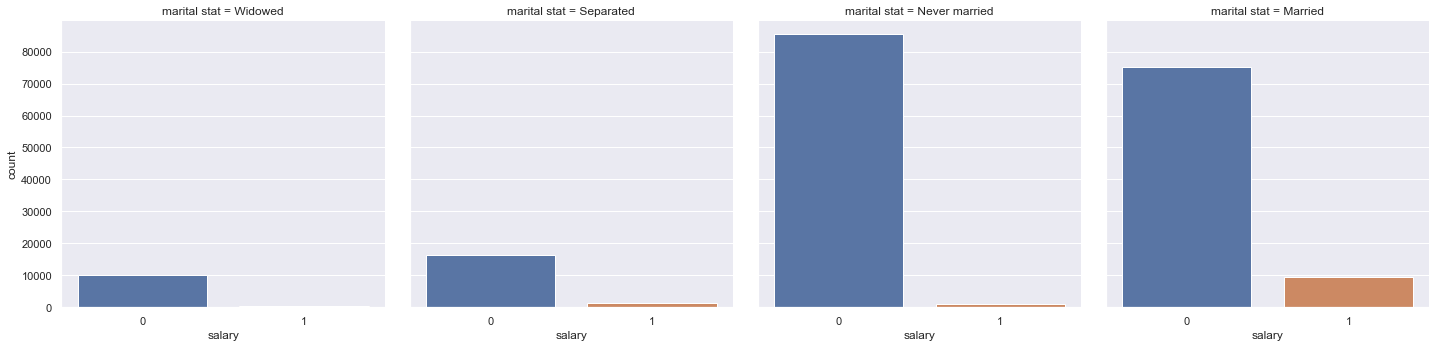

In [19]:
sns.catplot(x='salary', col='marital stat', kind='count', data=df)
print(df[df['marital stat']=='Married']['salary'].sum()/df[df['marital stat']=='Married']['salary'].count())
print(df[df['marital stat']!='Married']['salary'].sum()/df[df['marital stat']!='Married']['salary'].count())

**Occupation matters, being exec, sales or professional trade leads to higher salaries**

0.224815531948
0.0234958618766


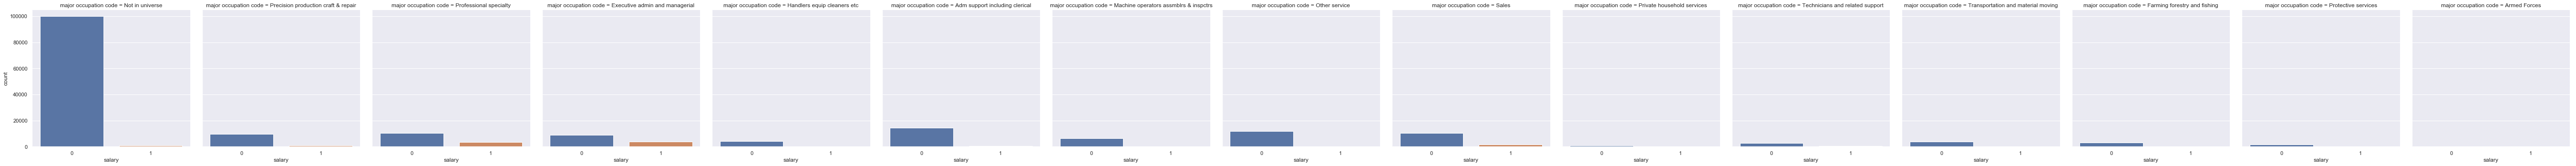

In [23]:
# major occupation code
well_paid_occupations = ['Professional specialty', 'Executive admin and managerial', 'Sales']
sns.catplot(x='salary', col='major occupation code', kind='count', data=df)

print(df[df['major occupation code'].isin(well_paid_occupations)]['salary'].sum()/df[df['major occupation code'].isin(well_paid_occupations)]['salary'].count())
print(df[~df['major occupation code'].isin(well_paid_occupations)]['salary'].sum()/df[~df['major occupation code'].isin(well_paid_occupations)]['salary'].count())

**Industry matters, working in finance or manufacturing leads to higher salaries**

0.186182669789
0.0485042889466


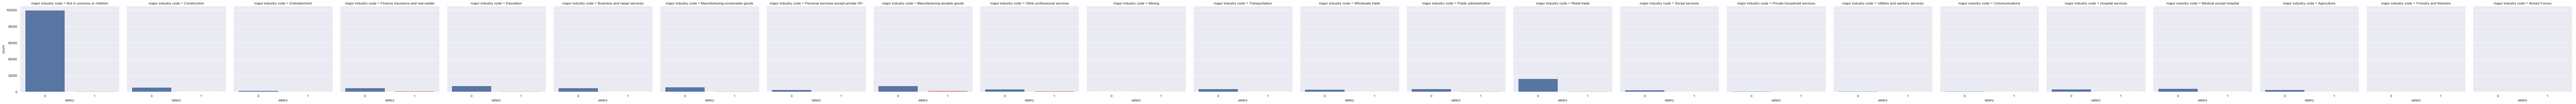

In [28]:
# major occupation code
well_paid_industries = ['Other professional services', 'Manufacturing-durable goods', 'Finance insurance and real estate']
sns.catplot(x='salary', col='major industry code', kind='count', data=df)

print(df[df['major industry code'].isin(well_paid_industries)]['salary'].sum()/df[df['major industry code'].isin(well_paid_industries)]['salary'].count())
print(df[~df['major industry code'].isin(well_paid_industries)]['salary'].sum()/df[~df['major industry code'].isin(well_paid_industries)]['salary'].count())

0.0673498043199
0.0345170719572


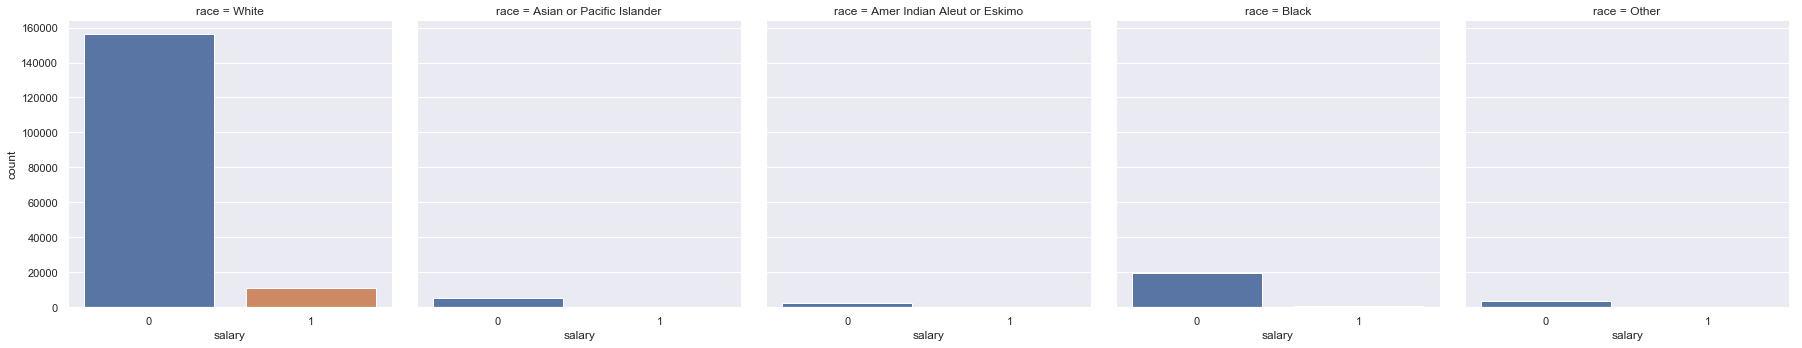

In [32]:
# Race, perhaps not as significant as initially expected
sns.catplot(x='salary', col='race', kind='count', data=df)

print(df[df['race']=='White']['salary'].sum()/df[df['race']=='White']['salary'].count())
print(df[df['race']!='White']['salary'].sum()/df[df['race']!='White']['salary'].count())

** Householders earn more **

0.127870155681
0.022015671353


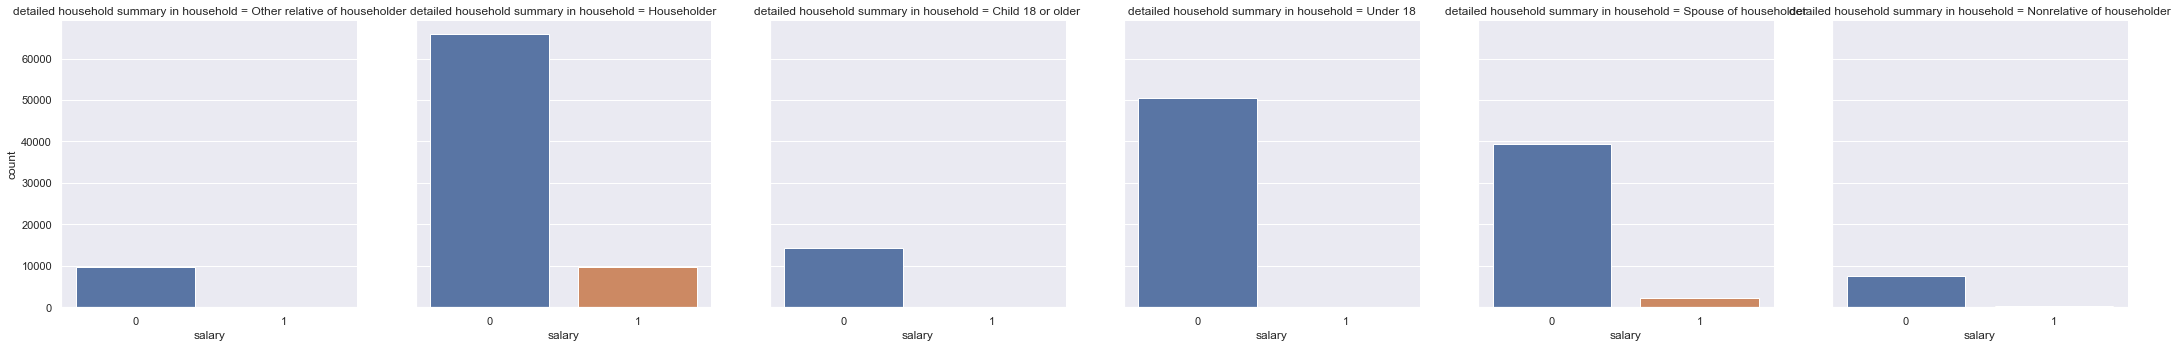

In [34]:
sns.catplot(x='salary', col='detailed household summary in household', kind='count', data=df)

print(df[df['detailed household summary in household']=='Householder']['salary'].sum()/df[df['detailed household summary in household']=='Householder']['salary'].count())
print(df[df['detailed household summary in household']!='Householder']['salary'].sum()/df[df['detailed household summary in household']!='Householder']['salary'].count())


** People who file joint taxes earn more... not sure how the tax system works in the US... **

0.131383286586
0.0267065233843


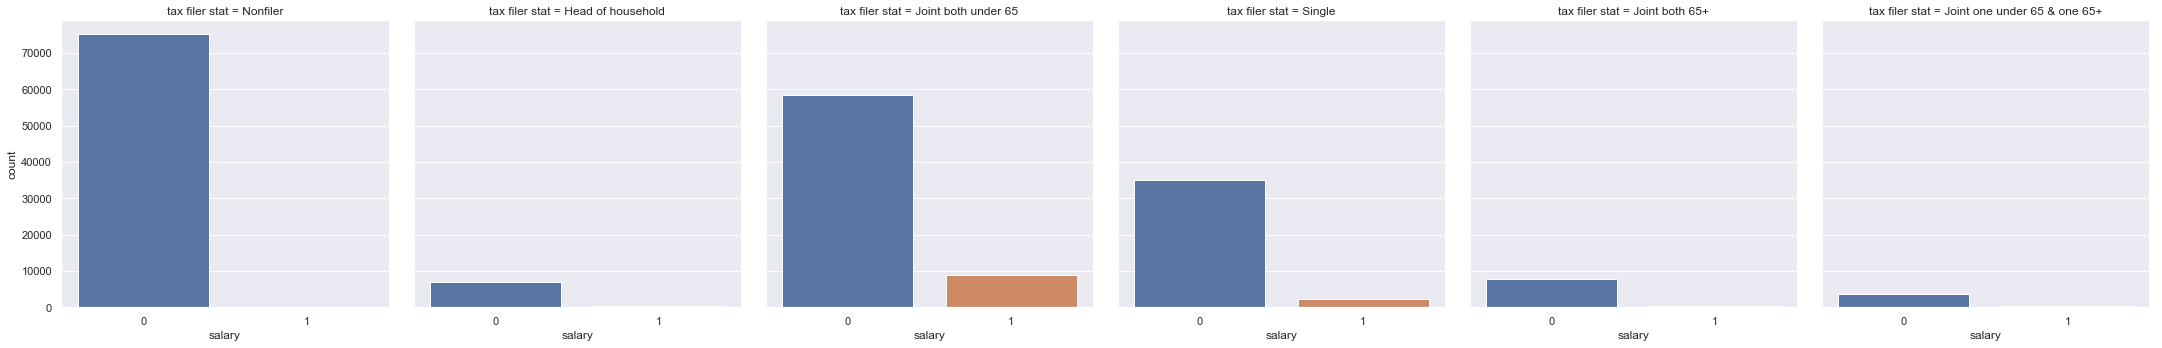

In [40]:
sns.catplot(x='salary', col='tax filer stat', kind='count', data=df)
join_cats = ['Joint both under 65']

print(df[df['tax filer stat'].isin(join_cats)]['salary'].sum()/df[df['tax filer stat'].isin(join_cats)]['salary'].count())
print(df[~df['tax filer stat'].isin(join_cats)]['salary'].sum()/df[~df['tax filer stat'].isin(join_cats)]['salary'].count())


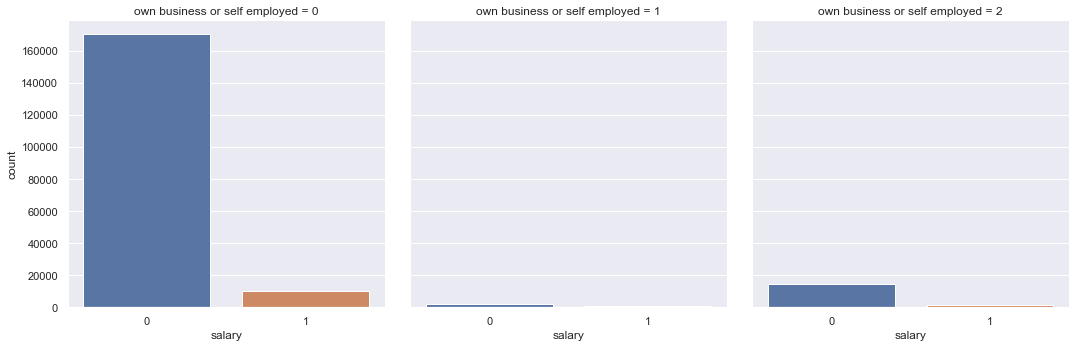

In [46]:
sns.catplot(x='salary', col='own business or self employed', kind='count', data=df)
# join_cats = ['Joint both under 65']

# print(df[df['tax filer stat'].isin(join_cats)]['salary'].sum()/df[df['tax filer stat'].isin(join_cats)]['salary'].count())
# print(df[~df['tax filer stat'].isin(join_cats)]['salary'].sum()/df[~df['tax filer stat'].isin(join_cats)]['salary'].count())


In [17]:
df

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,salary,set
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,Native- Born in the United States,0,No,2,0,95,0,train
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Separated,Construction,Precision production craft & repair,...,United-States,United-States,Native- Born in the United States,0,No,2,52,94,0,train
2,18,Not in universe,0,0,Secondary school,0,High school,Never married,Not in universe or children,Not in universe,...,Asia,Asia,Foreign born- Not a citizen of U S,0,No,2,0,95,0,train
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,Native- Born in the United States,0,No,0,0,94,0,train
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,Native- Born in the United States,0,No,0,0,94,0,train
5,48,Private,40,10,Some college but no degree,1200,Not in universe,Married,Entertainment,Professional specialty,...,United-States,United-States,Native- Born in the United States,2,No,2,52,95,0,train
6,42,Private,34,3,Undergraduate,0,Not in universe,Married,Finance insurance and real estate,Executive admin and managerial,...,United-States,United-States,Native- Born in the United States,0,No,2,52,94,0,train
7,28,Private,4,40,High school graduate,0,Not in universe,Never married,Construction,Handlers equip cleaners etc,...,United-States,United-States,Native- Born in the United States,0,No,2,30,95,0,train
8,47,Local government,43,26,Some college but no degree,876,Not in universe,Married,Education,Adm support including clerical,...,United-States,United-States,Native- Born in the United States,0,No,2,52,95,0,train
9,34,Private,4,37,Some college but no degree,0,Not in universe,Married,Construction,Machine operators assmblrs & inspctrs,...,United-States,United-States,Native- Born in the United States,0,No,2,52,94,0,train


In [ ]:
df['']'weeks worked in year'